## DATA PREPROCESSING

In [146]:
#Importing the libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
#Load dataset
dataset=pd.read_csv('Churn_Modelling (1).csv')

DATA EXPLORATION


In [148]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [149]:
dataset.shape

(10000, 14)

In [150]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [151]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [152]:
len(dataset.select_dtypes(include='object').columns)

3

In [153]:
dataset.select_dtypes(include=['int','float']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [154]:
len(dataset.select_dtypes(include=['int','float']).columns)

11

In [155]:
# statistical summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Handling with missing values


In [156]:
dataset.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [157]:
#Removing Unwanted collums
dataset = dataset.drop(columns=['RowNumber','CustomerId','Surname'])

In [158]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [159]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [160]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [161]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [162]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [163]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


COUNTPLOT

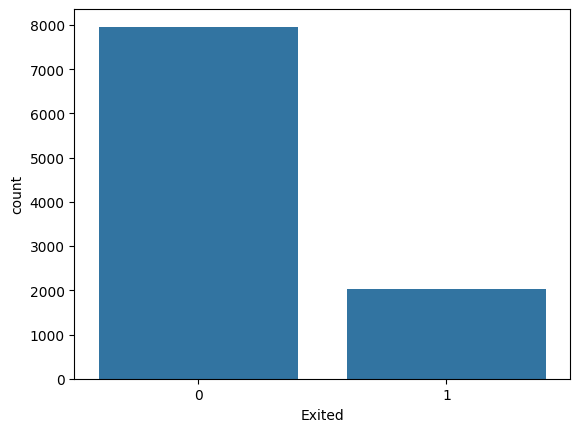

In [164]:
sns.countplot(x='Exited', data=dataset)
plt.show()

In [165]:
# Staying with the bank
(dataset.Exited == 0).sum()

np.int64(7963)

In [166]:

# Exited customers
(dataset.Exited == 1).sum()

np.int64(2037)

Correlation matrix and heatmap

In [167]:
dataset_2 = dataset.drop(columns='Exited')

<Axes: title={'center': 'Correlated with Exited'}>

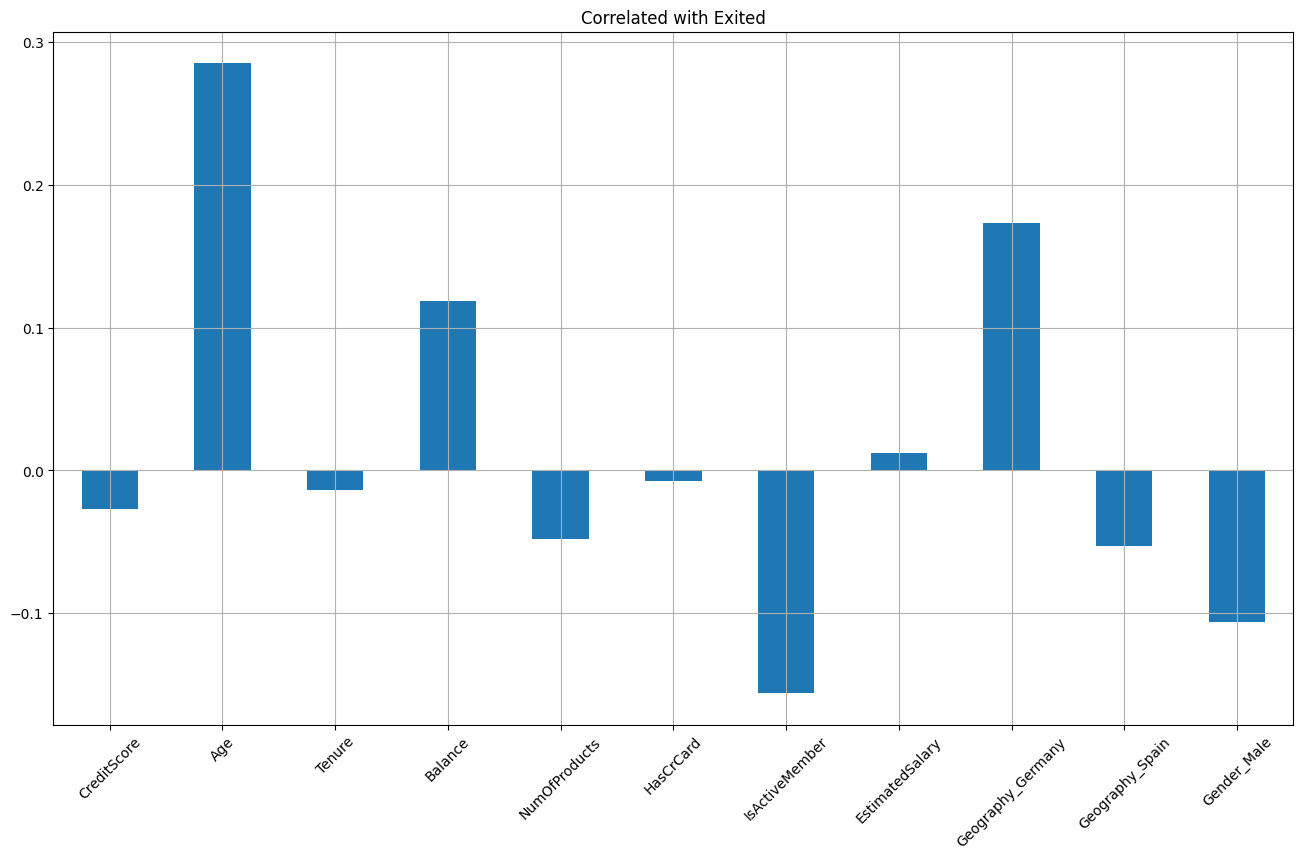

In [168]:

dataset_2.corrwith(dataset['Exited']).plot.bar(
    figsize=(16,9), title='Correlated with Exited', rot=45, grid=True
)


In [169]:
corr = dataset.corr()

<Axes: >

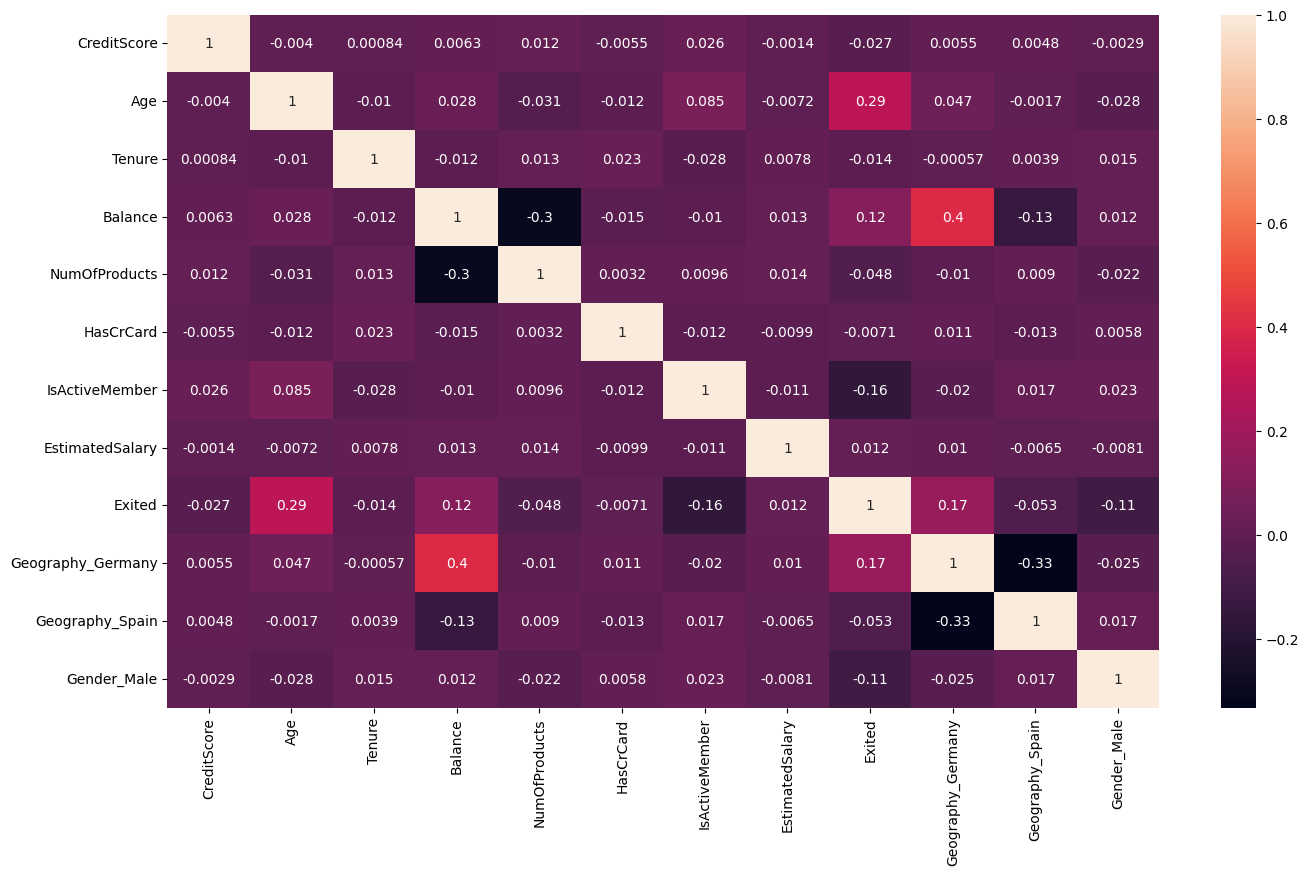

In [170]:

plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

SPLITING THE DATASET


In [171]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [172]:
x=dataset.drop(columns='Exited')

In [173]:
print(x)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                  1        101348.88              False            Fa

In [174]:
y=dataset['Exited']
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

FEATURE SCALLING

In [176]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [177]:
print(x_train)

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]


In [178]:
print(x_test)

[[-0.55204276 -0.36890377  1.04473698 ...  1.75486502 -0.57369368
  -1.09168714]
 [-1.31490297  0.10961719 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 [ 0.57162971  0.30102557  1.04473698 ... -0.5698444   1.74309049
  -1.09168714]
 ...
 [-0.74791227 -0.27319958 -1.37744033 ... -0.5698444   1.74309049
   0.91601335]
 [-0.00566991 -0.46460796 -0.33936434 ...  1.75486502 -0.57369368
   0.91601335]
 [-0.79945688 -0.84742473  1.04473698 ...  1.75486502 -0.57369368
   0.91601335]]


BUILDING THE MODEL

1. Logistic Regresion


In [179]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [180]:
y_pred=classifier.predict(x_test)

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [182]:
results = pd.DataFrame(
    [['Logistic regression', acc, f1, prec, rec]],
    columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall']
)

In [183]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037


In [184]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


CROSS VALIDATION

In [185]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.85 %
Standard Deviation is 0.86 %


RANDOM FOREST

In [186]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier()
classifier_rf.fit(x_train,y_train)

RandomForestClassifier()

In [187]:
y_pred=classifier_rf.predict(x_test)


In [188]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [189]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [190]:
model_results = pd.DataFrame(
    [['Random forest', acc, f1, prec, rec]],
    columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall']
)

results = pd.concat([results, model_results], ignore_index=True)

In [191]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.8110,0.336842,0.581818,0.237037
1,Random forest,0.8695,0.622287,0.751748,0.530864


In [192]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1524   71]
 [ 190  215]]


Cross validation


In [193]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.08 %
Standard Deviation is 1.00 %


3.***XGBoost***


Documentation:https://xgboost.readthedocs.io/en/latest/

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning


In [194]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [195]:
y_pred=classifier_xgb.predict(x_test)

In [196]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost classifier', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.8110,0.336842,0.581818,0.237037
1,Random forest,0.8695,0.622287,0.751748,0.530864
2,XGBoost classifier,0.8485,0.584362,0.657407,0.525926


In [198]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1484  111]
 [ 192  213]]


CROSS VALIDATION

In [199]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))


Accuracy is 84.82 %
Standard Deviation is 1.31 %


Randomized Search to find the best parameters (XGBoost Classifier)

In [200]:
from sklearn.model_selection import RandomizedSearchCV

In [201]:
parameters = {
    'learning_rate':[0.05, 0.1, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5 , 6, 7, 8 , 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7]
}

In [202]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [214]:
randomized_search = RandomizedSearchCV(
    estimator=classifier_xgb,
    param_distributions=parameters,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=0
)

randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=0, scoring='accuracy', verbose=2)

In [215]:
print(randomized_search.best_params_)
print(randomized_search.best_score_)

{'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}
0.8629999999999999


 Final Model (XGBoost Classifier)

In [216]:
best_params = randomized_search.best_params_

classifier = XGBClassifier(
    **best_params,
    random_state=0,
    eval_metric='logloss'
)

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [217]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

final_results = pd.DataFrame(
    [['Final XGBoost', acc, f1, prec, rec]],
    columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall']
)

results = pd.concat([results, final_results], ignore_index=True)

results

,Model,Accuracy,F1,precision,Recall,Precision
0,Logistic regression,0.8110,0.336842,0.581818,0.237037,NaN
1,Random forest,0.8695,0.622287,0.751748,0.530864,NaN
2,XGBoost classifier,0.8485,0.584362,0.657407,0.525926,NaN
3,Final XGBoost,0.8675,0.618705,0.741379,0.530864,NaN
4,Final XGBoost,0.8645,0.605531,NaN,0.513580,0.737589


In [218]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1521   74]
 [ 197  208]]


**Cross** **validation**

In [219]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.45 %
Standard Deviation is 0.93 %


Predicting a single observation

In [226]:
X = dataset.drop('Exited', axis=1)
y = dataset['Exited']

In [227]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [230]:
feature_names = X.columns
ingle_obs = [[
    619, 42, 2, 0.00, 1, 1, 1, 101348.88,
    0, 0, 0
]]

single_obs_df = pd.DataFrame(single_obs, columns=feature_names)

In [231]:
single_obs_scaled = sc.transform(single_obs_df)

prediction = classifier.predict(single_obs_scaled)

print(prediction)

[0]
